# Problem 1

Before you start to work on Problem 1, please visit [this page](https://canvas.mit.edu/files/1128379/download?download_frd=1) to download the installation instructions.

Please install Julia (v1.5.3), JuMP (v0.20.0) and Gurobi (v9.1.1) on your computer as instructed by the tutorial on Canvas. These are the versions that the teaching team will provide support for. You should use Gurobi as the solver for all JuMP related problems, and use the Plots or StatsPlots packages for graphing.

Before you submit this Jupyter notebook, please use `Cell` $\rightarrow$ `Run All` to make the output of your codes available to the TAs.

## Part (a)

First, on your PDF writeup, write down the formulation of this problem. Be sure to clearly indicate what your decision variables, objective, and constraints are.

Then, in the cell below, write Julia/JuMP codes to describe the linear program.

In [1]:
using JuMP, DataFrames, Gurobi

#initializing a model named "m" using the Gurobi optimizer
m = Model(with_optimizer(Gurobi.Optimizer))


# Decision Variables

# The decision variables are the intensities of each beamlet for all of the beams (6 in total: x[1],x[2],...,x[6])
# Non-negativity constraint included! 

@variables m begin
    x[1:6] >= 0
end


#Objective Function

#Dosages
voxel_1 = 1*x[1] + 1*x[4]
voxel_3 = 2*x[1] + 2*x[6]
voxel_4 = 1*x[4] + 1*x[2]
voxel_9 = 2.5*x[3] + 2.5*x[6]
spinal_cord =  2*x[2] + 2*x[5]

#minizing the total dose to all healthy tissues and the spinal cord
@objective(m,Min,voxel_1 + voxel_3 + voxel_4 + voxel_9 + spinal_cord)


# Constraints

#Voxel 2
@constraint(m,2*x[5] + 2 * x[1] >= 7)

#Voxel 6
@constraint(m,2.5*x[2] + 2.5 * x[6] >= 7)

#Voxel 7
@constraint(m,1.5*x[3] + 1.5 * x[4] >= 7)

#Voxel 8
@constraint(m,1.5*x[3] + 1.5 * x[5] >= 7)

#Voxel 5/Spinal Cord
@constraint(m,2*x[2] + 2 * x[5] <= 5)

Academic license - for non-commercial use only - expires 2021-04-24


2 x[2] + 2 x[5] ≤ 5.0

## Part (b)

In the cell below, write Julia/JuMP codes to solve this problem with Gurobi.

In [2]:
#--- Write codes here to query the optimal solutions

optimize!(m)

# Showing the intensities for each of the 6 beamlets
@show value(x[1]);
@show value(x[2]);
@show value(x[3]);
@show value(x[4]);
@show value(x[5]);
@show value(x[6]);

# Showing the optimal objective function value
@show objective_value(m);


Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 6 columns and 10 nonzeros
Model fingerprint: 0x3b44f9b4
Coefficient statistics:
  Matrix range     [2e+00, 2e+00]
  Objective range  [2e+00, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 7e+00]
Presolve time: 0.01s
Presolved: 5 rows, 6 columns, 10 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.925000e+01   0.000000e+00      0s
       6    3.1016667e+01   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.02 seconds
Optimal objective  3.101666667e+01

User-callback calls 31, time in user-callback 0.00 sec
value(x[1]) = 1.0
value(x[2]) = 0.0
value(x[3]) = 2.1666666666666665
value(x[4]) = 2.5
value(x[5]) = 2.5
value(x[6]) = 2.8
objective_value(m) = 31.016666666666666


Then, write down the optimal solution - the optimal intensities of the beamlets and the optimal objective function value - on your PDF writeup. On the PDF writeup, answer the remaining questions of this part: intuitively, does this make sense?  Briefly explain why it does or does not make sense to you.  (There are many possible correct answers to this last part.)

## Part (c)

Suppose we would like to reduce the dose to the spinal cord as much as possible. We can do this by reducing the maximum dose that the spinal cord can receive. Adjust your spinal cord constraint to make sure that the spinal cord receives a total dose of no more than 4. How does the optimal solution change? Continue reducing the maximum total dose to the spinal cord by trying value 3, 2, 1, and 0. What happens to the optimal solution? 

In the cell below, write Julia/JuMP codes to solve this new problem. Please use Gurobi as the solver.

In [3]:
using JuMP, DataFrames, Gurobi

# Initializing an array to store all of the optimal objective function values with varying constraint for the maximum dose that the spinal cord can receive
spinal_cord_dosages = [0.0,0.0,0.0,0.0,0.0,0.0]

for i = 0:5
    
    #initializing a model named "m" using the Gurobi optimizer
    m = Model(with_optimizer(Gurobi.Optimizer))


    # Decision Variables

    # The decision variables are the intensities of each beamlet for all of the beams (6 in total: x[1],x[2],...,x[6])
    # Non-negativity constraint included! 

    @variables m begin
        x[1:6] >= 0
    end

    
    #Objective Function

    #Dosages
    voxel_1 = 1*x[1] + 1*x[4]
    voxel_3 = 2*x[1] + 2*x[6]
    voxel_4 = 1*x[4] + 1*x[2]
    voxel_9 = 2.5*x[3] + 2.5*x[6]
    spinal_cord =  2*x[2] + 2*x[5]

    #minizing the total dose to all healthy tissues and the spinal cord
    @objective(m,Min,voxel_1 + voxel_3 + voxel_4 + voxel_9 + spinal_cord)
    
    
    #constraints

    #Voxel 2
    @constraint(m,2*x[5] + 2 * x[1] >= 7)

    #Voxel 6
    @constraint(m,2.5*x[2] + 2.5 * x[6] >= 7)

    #Voxel 7
    @constraint(m,1.5*x[3] + 1.5 * x[4] >= 7)

    #Voxel 8
    @constraint(m,1.5*x[3] + 1.5 * x[5] >= 7)

    #Voxel 5/Spinal Cord
    #Constraint is changed from <= 0 to <= 1 ... to <= 5
    @constraint(m,2*x[2] + 2 * x[5] <= i)


    optimize!(m)

    # Storing the optimal objective function value for this specific model with the changed spinal cord constraint
    intermediate_objective_function_value = objective_value(m);
    spinal_cord_dosages[i+1] = intermediate_objective_function_value
    
end

#Show the different optimal solutions for maximum spinal total dosage of 0,1,2,3,4,and 5, respectively 
@show spinal_cord_dosages

Academic license - for non-commercial use only - expires 2021-04-24
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 6 columns and 10 nonzeros
Model fingerprint: 0x22db0db6
Coefficient statistics:
  Matrix range     [2e+00, 2e+00]
  Objective range  [2e+00, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e+00, 7e+00]
Presolve removed 5 rows and 6 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.4766667e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective  3.476666667e+01

User-callback calls 26, time in user-callback 0.00 sec
Academic license - for non-commercial use only - expires 2021-04-24
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 thread

6-element Array{Float64,1}:
 34.766666666666666
 34.016666666666666
 33.266666666666666
 32.516666666666666
 31.766666666666666
 31.016666666666666

Then, write down the optimal solutions - the optimal objective function values - on your PDF writeup. On the writeup, describe what happens to the optimal solution. How would you describe this trade off to the oncologist?

## Part (d)

In this part, we consider an alternative to having a constraint on the dosage into the spinal cord voxel. Suppose instead that the problem had two different linear objectives.

* `SpinalDosage` is the dosage into the spinal cell.
* `LightblueDosage` is the dosage into the healthy cells, excluding the spinal cell.

Linear programs (and optimization problems in general) are only permitted to have one objective.  So, for this problem, we will combine the two objectives into a single objective.  We will choose a parameter $p$ between $0$ and $1$ which is the proportion of SpinalDosage's contribution to the objective function.   The objective function is:

$$ p \times SpinalDosage + (1 - p) \times LightBlueDosage.$$ 

First, in the cell below, write Julia/JuMP codes to solve this linear program for $p = k/10$ for $k = 0$ to 10. (Please use Gurobi as the solver.)

In [4]:
#--- Model specification
using JuMP, DataFrames, Gurobi

#initializing a model named "m" using the Gurobi optimizer
m = Model(with_optimizer(Gurobi.Optimizer))

# Decision Variables

# The decision variables are the intensities of each beamlet for all of the beams (6 in total: x[1],x[2],...,x[6])
# Non-negativity constraint included! 

@variables m begin
    x[1:6] >= 0
end

# Initializing an array to store all of the spinal dosages for varying parameter p
spinal_dosages = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

for i = 0:10
    
    #changing the parameter p
    p = i/10
    
     
    #Objective Function

    #Dosages
    voxel_1 = 1*x[1] + 1*x[4]
    voxel_3 = 2*x[1] + 2*x[6]
    voxel_4 = 1*x[4] + 1*x[2]
    voxel_9 = 2.5*x[3] + 2.5*x[6]
    spinal_cord =  2*x[2] + 2*x[5]

    #minizing the total dose to all healthy tissues and the spinal cord with varying parameter p
    @objective(m,Min,(1-p)*(voxel_1 + voxel_3 + voxel_4 + voxel_9) + (p* spinal_cord))
    
    #constraints

    #Voxel 2
    @constraint(m,2*x[5] + 2 * x[1] >= 7)

    #Voxel 6
    @constraint(m,2.5*x[2] + 2.5 * x[6] >= 7)

    #Voxel 7
    @constraint(m,1.5*x[3] + 1.5 * x[4] >= 7)

    #Voxel 8
    @constraint(m,1.5*x[3] + 1.5 * x[5] >= 7)

    optimize!(m)

    #Storing the spinal dosage value for this particular parameter p
    intermediate_spinal_dosage = (2 * value(x[2])) + (2 * value(x[5]));
    spinal_dosages[i+1] = intermediate_spinal_dosage
end

@show spinal_dosages

Academic license - for non-commercial use only - expires 2021-04-24
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4 rows, 6 columns and 8 nonzeros
Model fingerprint: 0x2e5f2605
Coefficient statistics:
  Matrix range     [2e+00, 2e+00]
  Objective range  [1e+00, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e+00, 7e+00]
Presolve removed 4 rows and 6 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2133333e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective  1.213333333e+01

User-callback calls 29, time in user-callback 0.00 sec
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 8 rows, 6 columns and 16 nonzeros
Coefficient

11-element Array{Float64,1}:
 14.933333333333334
 14.933333333333334
 14.933333333333334
 12.6
 12.6
 12.6
 12.6
  0.0
  0.0
  0.0
  0.0

Then, in the cell below, write Julia codes to graph the `SpinalDosage` as a function of $p$. Your output of the codes should include this graph.

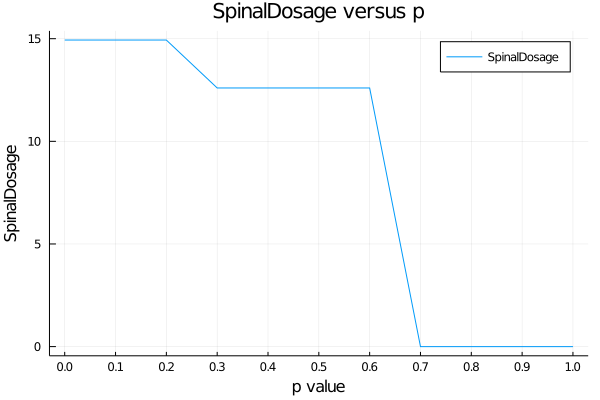

In [5]:
using Plots

# Labeling the X-Axis 
x_axis = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

# Spinal Dosages
spinal_dosages_complete_data = spinal_dosages

plot(x_axis, label= "SpinalDosage",spinal_dosages_complete_data, title = "SpinalDosage versus p", xlabel= "p value", ylabel = "SpinalDosage", xticks=x_axis)

On your PDF writeup, describe: What observations can you make about this graph?  How does your graph compare with your answer to part c? 